## Task1: Solving the pendulum

In this task, you should implement the following three methods to solve for the dynamics of a pendulum.


### Euler method
$$
  \theta(t+\delta) = \theta(t) + \dot{\theta}(t) \delta
$$
$$
  \dot{\theta}(t+\delta) = \dot{\theta}(t) + \ddot{\theta}(t) \delta
$$


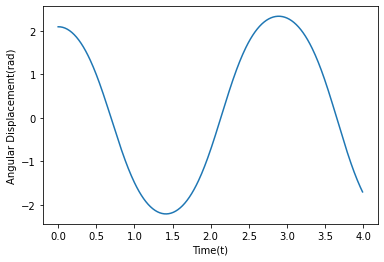

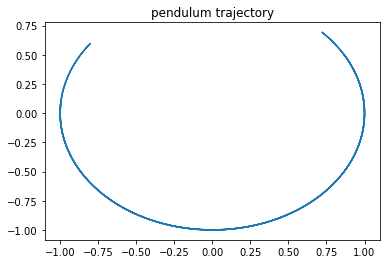

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from math import *
L=1
ad=np.pi*(2/3)
AD=[] #angular displacement
X=[]
Y=[]
t=0
omega=0 #angular frequecy
alpha=0 #angular acceleration
g=9.80655 #gravity
T=[]
dt=0.01

for i in range(400):
    T.append(t)
    AD.append(ad)
    alpha = -(g/L)*sin(ad)
    t += dt
    ad += omega*dt
    omega += alpha*dt

plt.plot(T,AD)
plt.xlabel('Time(t)')
plt.ylabel('Angular Displacement(rad)')
plt.show()

for i in range(len(AD)-1):
    X.append(sin(AD[i]))
    Y.append(-cos(AD[i]))
plt.plot(X,Y)
plt.title('pendulum trajectory')
plt.show()

### Staggered algorithm
$$
  \dot{x}(t+dt) = \dot{x}(t) + \ddot{x}(t) dt
$$
$$
  x(t+dt) = x(t) + \dot{x}(t+dt) dt
$$

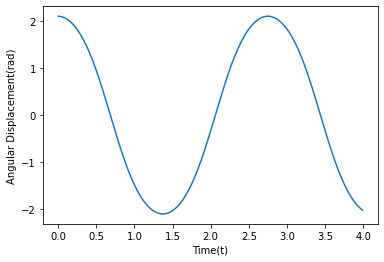

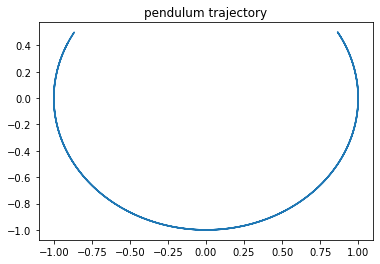

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from math import *
L=1
ad=np.pi*(2/3)
AD=[] #angular displacement
X=[]
Y=[]
t=0
omega=0 #angular frequency
alpha=0 #angular acceleration
g=9.80655 #gravity
T=[]
dt=0.01

for i in range(400):
    T.append(t)
    AD.append(ad)
    alpha = -(g/L)*sin(ad)
    t += dt
    omega += alpha*dt
    ad += omega*dt
plt.plot(T,AD)
plt.xlabel('Time(t)')
plt.ylabel('Angular Displacement(rad)')
plt.show()

for i in range(len(AD)-1):
    X.append(sin(AD[i]))
    Y.append(-cos(AD[i]))
plt.plot(X,Y)
plt.title('pendulum trajectory')
plt.show()

### Velocity Verlet algorithm
$$
  \dot{x}(t+dt/2) = \dot{x}(t) + \ddot{x}(t) dt/2
$$
$$
  x(t+dt) = x(t) + \dot{x}(t+dt/2) dt
$$
$$
  \dot{x}(t+dt) = \dot{x}(t+dt/2) + \ddot{x}(t+dt) dt/2
$$

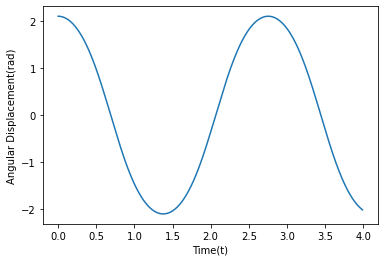

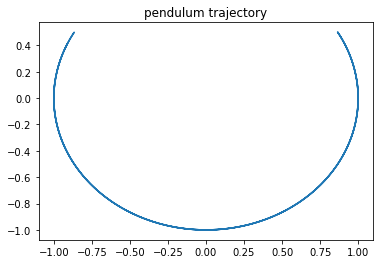

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from math import *
L = 1
ad = np.pi*(2/3)
AD = [] #angular displacement
X = []
Y = []
t = 0
omega = 0 #angular velocity(t)
omega0 = 0 #angular velocity(t+dt/2)
alpha = 0 #angular acceleration
g = 9.80655 #gravity
T = []
dt = 0.01
for i in range(400):
    T.append(t)
    AD.append(ad)
    t += dt
    alpha = -(g/L)*sin(ad)
    omega0 = omega + alpha*dt/2
    ad += omega0*dt #This step we calculate the x(t+dt)
    alpha = -(g/L)*sin(ad) #We use x(t+dt) to calculate the new angular acceleration
    omega = omega0 + alpha*dt/2
plt.plot(T,AD)
plt.xlabel('Time(t)')
plt.ylabel('Angular Displacement(rad)')
plt.show()

for i in range(len(AD)-1):
    X.append(sin(AD[i]))
    Y.append(-cos(AD[i]))
plt.plot(X,Y)
plt.title('pendulum trajectory')
plt.show()

## Task2: Fidelity and Accuracy
For this task, we assume $\dot{\theta}(0)=0$. You should show the result for $\theta(0)=2\pi/3$ and some other $\theta(0)$ of your choice.

* For each of the method, plot the pendulum trajectory $\theta(t)$ for time step $\delta=0.1$, $0.01$, and $0.001$. Zoom in on the curve at $t=1$ and visually compare the values from the three time steps. 
* Does it appear that the trajectory if converging as $\delta\rightarrow 0$.
* What order cumulative accuracy do you find: is each curve better by a factor of 10, 100, 1000, ...?
* Use `numpy.logspace` to create an array of $\delta$ then plot $\theta(t=1)$ as a function of $\delta$ or $1/\delta$. Describe what you observe.

### (I)Euler method

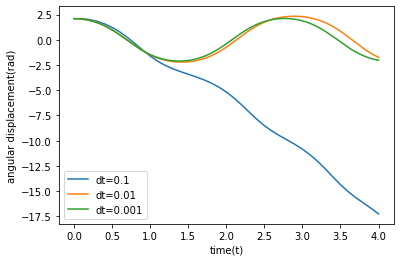

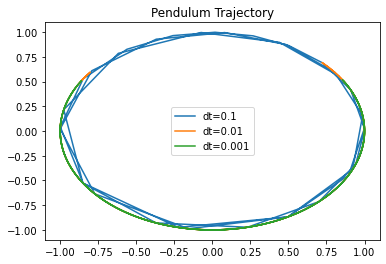

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from math import *
L = 1
ad0 = np.pi*(2/3)
ad1 = ad0
ad2 = ad0
ad3 = ad0
AD1 = [] #angular displacement
AD2 = []
AD3 = []
X1 = []
X2 = []
X3 = []
Y1 = []
Y2 = []
Y3 = []
t1 = 0
t2 = 0
t3 = 0
omega1 = 0 #angular frequecy
omega2 = 0
omega3 = 0
alpha1 = 0 #angular acceleration
alpha2 = 0
alpha3 = 0
g = 9.80655 #gravity
T1 = []
T2 = []
T3 = []
dt1 = 0.1
dt2 = 0.01
dt3 = 0.001

for i in range(41):
    T1.append(t1)
    AD1.append(ad1)
    alpha1 = -(g/L)*sin(ad1)
    t1 += dt1
    ad1 += omega1*dt1
    omega1 += alpha1*dt1

for i in range(len(AD1)-1):
    X1.append(sin(AD1[i]))
    Y1.append(-cos(AD1[i]))

for i in range(401):
    T2.append(t2)
    AD2.append(ad2)
    alpha2 = -(g/L)*sin(ad2)
    t2 += dt2
    ad2 += omega2*dt2
    omega2 += alpha2*dt2


for i in range(len(AD2)-1):
    X2.append(sin(AD2[i]))
    Y2.append(-cos(AD2[i]))

for i in range(4001):
    T3.append(t3)
    AD3.append(ad3)
    alpha3 = -(g/L)*sin(ad3)
    t3 += dt3
    ad3 += omega3*dt3
    omega3 += alpha3*dt3


for i in range(len(AD3)-1):
    X3.append(sin(AD3[i]))
    Y3.append(-cos(AD3[i]))

plt.plot(T1,AD1,label='dt=0.1')
plt.plot(T2,AD2,label='dt=0.01')
plt.plot(T3,AD3,label='dt=0.001')

plt.xlabel('time(t)')
plt.ylabel('angular displacement(rad)')

plt.legend()
plt.show()

plt.plot(X1,Y1,label='dt=0.1')
plt.plot(X2,Y2,label='dt=0.01')
plt.plot(X3,Y3,label='dt=0.001')
plt.title('Pendulum Trajectory')

plt.legend()
plt.show()


### (II)Staggered algorithm

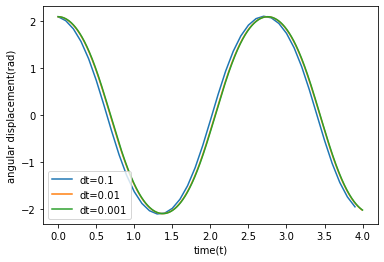

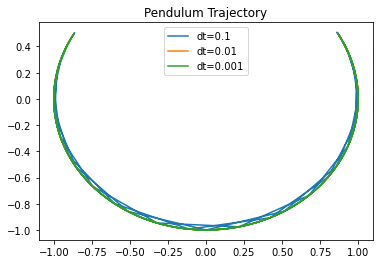

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from math import *
L = 1
ad0 = np.pi*(2/3)
ad1 = ad0
ad2 = ad0
ad3 = ad0
AD1 = [] #angular displacement
AD2 = []
AD3 = []
X1 = []
X2 = []
X3 = []
Y1 = []
Y2 = []
Y3 = []
t1 = 0
t2 = 0
t3 = 0
omega1 = 0 #angular frequecy
omega2 = 0
omega3 = 0
alpha1 = 0 #angular acceleration
alpha2 = 0
alpha3 = 0
g = 9.80655 #gravity
T1 = []
T2 = []
T3 = []
dt1 = 0.1
dt2 = 0.01
dt3 = 0.001

for i in range(40):
    T1.append(t1)
    AD1.append(ad1)
    alpha1 = -(g/L)*sin(ad1)
    t1 += dt1
    omega1 += alpha1*dt1
    ad1 += omega1*dt1

for i in range(len(AD1)-1):
    X1.append(sin(AD1[i]))
    Y1.append(-cos(AD1[i]))

for i in range(400):
    T2.append(t2)
    AD2.append(ad2)
    alpha2 = -(g/L)*sin(ad2)
    t2 += dt2
    omega2 += alpha2*dt2
    ad2 += omega2*dt2


for i in range(len(AD2)-1):
    X2.append(sin(AD2[i]))
    Y2.append(-cos(AD2[i]))

for i in range(4000):
    T3.append(t3)
    AD3.append(ad3)
    alpha3 = -(g/L)*sin(ad3)
    t3 += dt3
    omega3 += alpha3*dt3
    ad3 += omega3*dt3



for i in range(len(AD3)-1):
    X3.append(sin(AD3[i]))
    Y3.append(-cos(AD3[i]))

plt.plot(T1,AD1,label='dt=0.1')
plt.plot(T2,AD2,label='dt=0.01')
plt.plot(T3,AD3,label='dt=0.001')

plt.xlabel('time(t)')
plt.ylabel('angular displacement(rad)')

plt.legend()
plt.show()

plt.plot(X1,Y1,label='dt=0.1')
plt.plot(X2,Y2,label='dt=0.01')
plt.plot(X3,Y3,label='dt=0.001')
plt.title('Pendulum Trajectory')

plt.legend()
plt.show()

### (III)Velocity Verlet algorithm

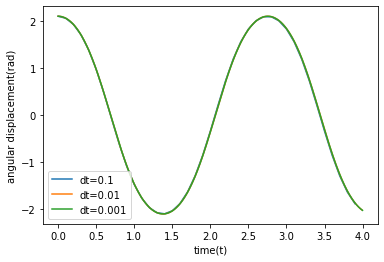

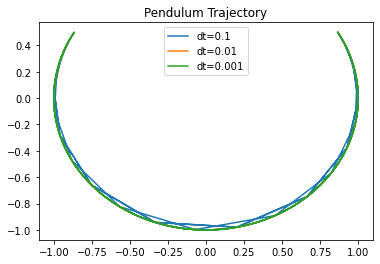

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from math import *
L = 1
ad0 = np.pi*(2/3)
ad1 = ad0
ad2 = ad0
ad3 = ad0
AD1 = [] #angular displacement
AD2 = []
AD3 = []
X1 = []
X2 = []
X3 = []
Y1 = []
Y2 = []
Y3 = []
t1 = 0
t2 = 0
t3 = 0
omega1 = 0 #angular velocity
omega2 = 0
omega3 = 0
omega01 = 0#angular velocity(t+dt/2)
omega02 = 0
omega03 = 0
alpha1 = 0 #angular acceleration
alpha2 = 0
alpha3 = 0
g = 9.80655 #gravity
T1 = []
T2 = []
T3 = []
dt1 = 0.1
dt2 = 0.01
dt3 = 0.001

for i in range(40):
    T1.append(t1)
    AD1.append(ad1)
    t1 += dt1
    alpha1 = -(g/L)*sin(ad1)
    omega01 = omega1 + alpha1*dt1/2
    ad1 += omega01*dt1 #This step we calculate the x(t+dt)
    alpha1 = -(g/L)*sin(ad1) #We use x(t+dt) to calculate the new angular acceleration
    omega1 = omega01 + alpha1*dt1/2

for i in range(len(AD1)-1):
    X1.append(sin(AD1[i]))
    Y1.append(-cos(AD1[i]))

for i in range(400):
    T2.append(t2)
    AD2.append(ad2)
    t2 += dt2
    alpha2 = -(g/L)*sin(ad2)
    omega02 = omega2 + alpha2*dt2/2
    ad2 += omega02*dt2 #This step we calculate the x(t+dt)
    alpha2 = -(g/L)*sin(ad2) #We use x(t+dt) to calculate the new angular acceleration
    omega2 = omega02 + alpha2*dt2/2


for i in range(len(AD2)-1):
    X2.append(sin(AD2[i]))
    Y2.append(-cos(AD2[i]))

for i in range(4000):
    T3.append(t3)
    AD3.append(ad3)
    t3 += dt3
    alpha3 = -(g/L)*sin(ad3)
    omega03 = omega3 + alpha3*dt3/2
    ad3 += omega03*dt3 #This step we calculate the x(t+dt)
    alpha3 = -(g/L)*sin(ad3) #We use x(t+dt) to calculate the new angular acceleration
    omega3 = omega03 + alpha3*dt3/2



for i in range(len(AD3)-1):
    X3.append(sin(AD3[i]))
    Y3.append(-cos(AD3[i]))

plt.plot(T1,AD1,label='dt=0.1')
plt.plot(T2,AD2,label='dt=0.01')
plt.plot(T3,AD3,label='dt=0.001')

plt.xlabel('time(t)')
plt.ylabel('angular displacement(rad)')

plt.legend()
plt.show()

plt.plot(X1,Y1,label='dt=0.1')
plt.plot(X2,Y2,label='dt=0.01')
plt.plot(X3,Y3,label='dt=0.001')
plt.title('Pendulum Trajectory')

plt.legend()
plt.show()

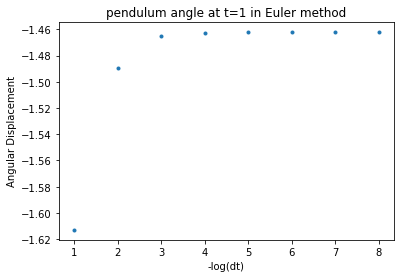

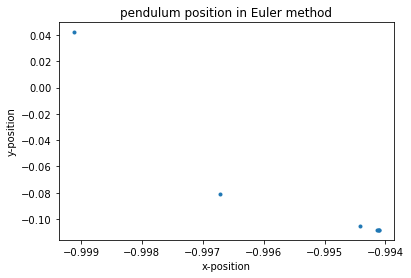

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from math import *
L = 1
g=9.80655
lo = []
AD = []
X = []
Y = []
I = []
for i in range(8):
    I.append(i+1)
    lo.append(10**(-(i+1)))
for i in range(len(lo)):
    ad = np.pi*(2/3)
    omega = 0
    alpha = 0
    for j in range(10**(i+1)):
        alpha = -(g/L)*sin(ad)
        ad += omega*lo[i]
        omega += alpha*lo[i]
    AD.append(ad)
for i in range(len(AD)-1):
    X.append(sin(AD[i]))
    Y.append(-cos(AD[i]))

plt.plot(I,AD,".")
plt.xlabel('-log(dt)')
plt.ylabel('Angular Displacement')
plt.title('pendulum angle at t=1 in Euler method')
plt.show()

plt.plot(X,Y,".")
plt.xlabel('x-position')
plt.ylabel('y-position')
plt.title('pendulum position in Euler method')
plt.show()

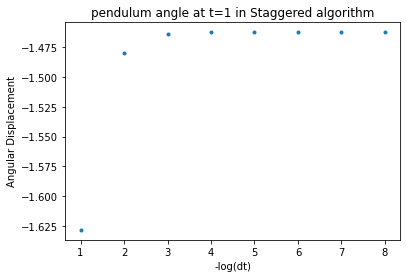

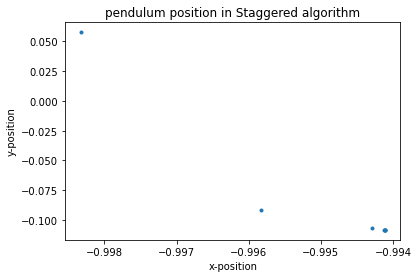

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from math import *
L = 1
g=9.80655
lo = []
AD = []
X = []
Y = []
I = []
for i in range(8):
    I.append(i+1)
    lo.append(10**(-(i+1)))
for i in range(len(lo)):
    ad = np.pi*(2/3)
    omega = 0
    alpha = 0
    for j in range(10**(i+1)):
        alpha = -(g/L)*sin(ad)
        omega += alpha*lo[i]
        ad += omega*lo[i]
    AD.append(ad)
for i in range(len(AD)-1):
    X.append(sin(AD[i]))
    Y.append(-cos(AD[i]))

plt.plot(I,AD,".")
plt.xlabel('-log(dt)')
plt.ylabel('Angular Displacement')
plt.title('pendulum angle at t=1 in Staggered algorithm')
plt.show()

plt.plot(X,Y,".")
plt.xlabel('x-position')
plt.ylabel('y-position')
plt.title('pendulum position in Staggered algorithm')
plt.show()

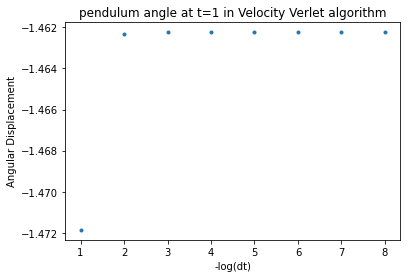

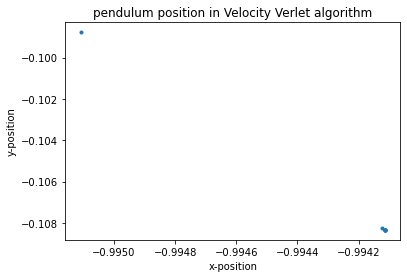

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from math import *
L = 1
g=9.80655
lo = []
AD = []
X = []
Y = []
I = []
for i in range(8):
    I.append(i+1)
    lo.append(10**(-(i+1)))
for i in range(len(lo)):
    ad = np.pi*(2/3)
    omega = 0
    omega0 = 0
    alpha = 0
    dt = lo[i]
    for j in range(10**(i+1)):
        alpha = -(g/L)*sin(ad)
        omega0 = omega + alpha*dt/2
        ad += omega0*dt #This step we calculate the x(t+dt)
        alpha = -(g/L)*sin(ad) #We use x(t+dt) to calculate the new angular acceleration
        omega = omega0 + alpha*dt/2
    AD.append(ad)
for i in range(len(AD)-1):
    X.append(sin(AD[i]))
    Y.append(-cos(AD[i]))

plt.plot(I,AD,".")
plt.xlabel('-log(dt)')
plt.ylabel('Angular Displacement')
plt.title('pendulum angle at t=1 in Velocity Verlet algorithm')
plt.show()

plt.plot(X,Y,".")
plt.xlabel('x-position')
plt.ylabel('y-position')
plt.title('pendulum position in Velocity Verlet algorithm')
plt.show()

## Task3: Stability

For you task, we assume $\theta(0)=0.001$, $\dot{\theta}(0)=0$, and $T=10$. 

* For each of the method, plot the pendulum trajectory $\theta(t)$ for time steps $\delta=0.1, 0.2, ...., 0.8$. 
* At about what $\delta_c$ does it go unstable?
* How does $\delta_c$ compare with the characteristic time period of the pendulum?
* At $\delta_c/2$, how accurate is the amplitude of the oscillation? (You will need to observe several periods in order to estimate the maximum amplitude of the solution)

### (I)Euler method
For Euler method the critical delta time $\delta_c$ is between 0.1 and 0.2

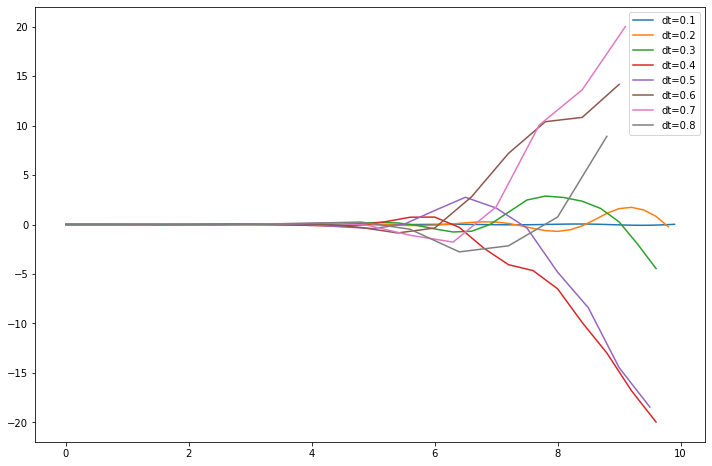

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from math import *
N = [1,2,3,4,5,6,7,8]
g = 9.80655
L = 1
plt.figure(figsize=(12,8))
for i in N:
    ad = 0.001
    omega = 0
    alpha = 0
    t = 0
    dt = 0.1*i
    AD = []
    T = []
    for j in range(int(10/dt)):
        T.append(t)
        AD.append(ad)
        t += dt
        alpha = -(g/L)*sin(ad)
        ad += omega*dt
        omega += alpha*dt
    plt.plot(T,AD,label='dt=0.'+str(i))
plt.legend()
plt.show()

### (II)Staggered algorithm
For Staggered algorithm the critical delta time $\delta_c$ is between 0.6 and 0.7

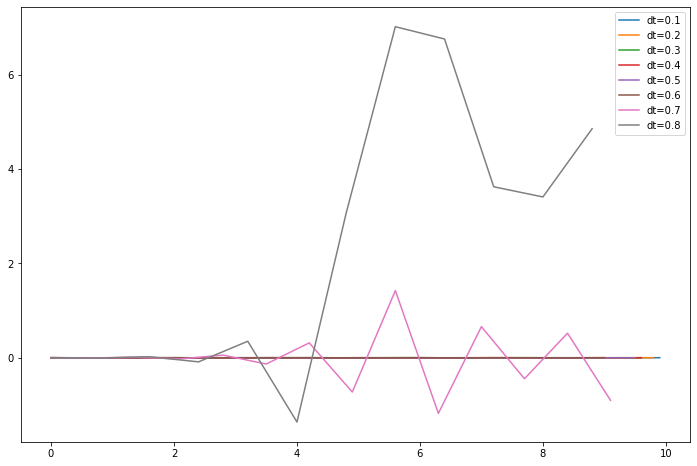

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from math import *
N = [1,2,3,4,5,6,7,8]
g = 9.80655
L = 1
plt.figure(figsize=(12,8))
for i in N:
    ad = 0.001
    omega = 0
    alpha = 0
    t = 0
    dt = 0.1*i
    AD = []
    T = []
    for j in range(int(10/dt)):
        T.append(t)
        AD.append(ad)
        t += dt
        alpha = -(g/L)*sin(ad)
        omega += alpha*dt
        ad += omega*dt
    plt.plot(T,AD,label='dt=0.'+str(i))
plt.legend()
plt.show()

### (III)Velocity Verlet algorithm
For Velocity Verlet algorithm the critical delta time $\delta_c$ is between 0.6 and 0.7

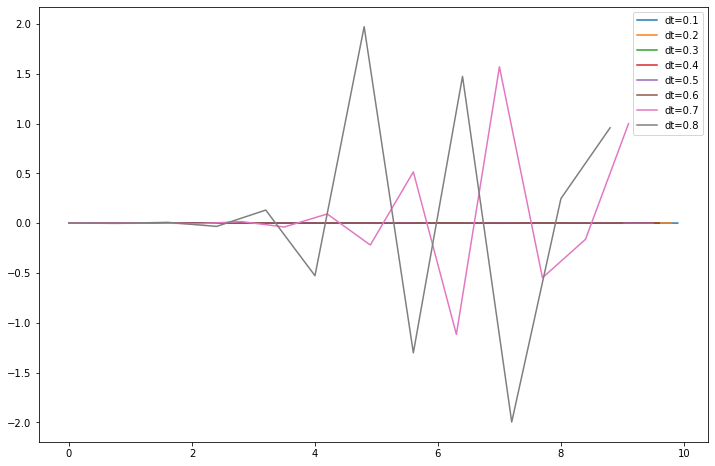

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from math import *
N = [1,2,3,4,5,6,7,8]
g = 9.80655
L = 1
plt.figure(figsize=(12,8))
for i in N:
    ad = 0.001
    omega = 0
    omega0 = 0 
    alpha = 0
    t = 0
    dt = 0.1*i
    AD = []
    T = []
    for j in range(int(10/dt)):
        T.append(t)
        AD.append(ad)
        t += dt
        alpha = -(g/L)*sin(ad)
        omega0 = omega + alpha*dt/2
        ad += omega0*dt #This step we calculate the x(t+dt)
        alpha = -(g/L)*sin(ad) #We use x(t+dt) to calculate the new angular acceleration
        omega = omega0 + alpha*dt/2
    plt.plot(T,AD,label='dt=0.'+str(i))
plt.legend()
plt.show()

## Task4: Period

* For each of the method, determine the period of the oscillation and compare to the exact result for time steps $\delta=0.1, 0.01, 0.001$.


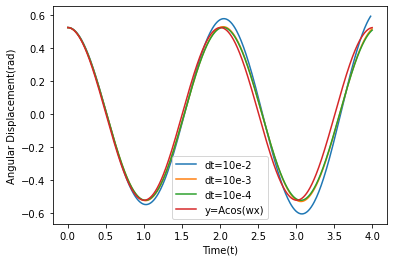

In [53]:
import matplotlib.pyplot as plt
import numpy as np
from math import *
g=9.80655 #gravity
L=1
ad0 = np.pi*(1/6)

for j in range(3):
    ad=ad0
    AD=[] #angular displacement
    t=0
    omega=0 #angular frequecy
    alpha=0 #angular acceleration
    T=[]
    dt=10**(-2-j)
    for i in range(int(4//dt)):
        T.append(t)
        AD.append(ad)
        alpha = -(g/L)*sin(ad)
        t += dt
        ad += omega*dt
        omega += alpha*dt
    plt.plot(T,AD,label='dt=10e'+str(-2-j))
x = 0
y = ad0
X = []
Y = []
for i in range(40001):
    X.append(x)
    Y.append(y)
    x += 0.0001 
    y = ad0*cos(np.sqrt(g/L)*x)
plt.plot(X,Y,label='y=Acos(wx)')
plt.xlabel('Time(t)')
plt.ylabel('Angular Displacement(rad)')
plt.legend()
plt.show()

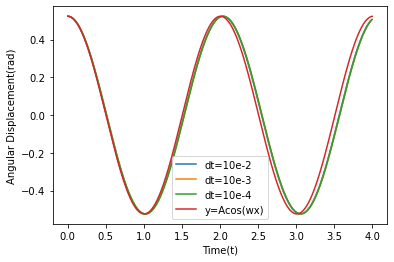

In [52]:
import matplotlib.pyplot as plt
import numpy as np
from math import *
g=9.80655 #gravity
L=1
ad0 = (1/6)*np.pi
for j in range(3):
    ad=ad0
    AD=[] #angular displacement
    t=0
    omega=0 #angular frequecy
    alpha=0 #angular acceleration
    T=[]
    dt=10**(-2-j)
    for i in range(int(4//dt)):
        T.append(t)
        AD.append(ad)
        alpha = -(g/L)*sin(ad)
        t += dt
        omega += alpha*dt
        ad += omega*dt
    plt.plot(T,AD,label='dt=10e'+str(-2-j))
x = 0
y = ad0
X = []
Y = []
for i in range(4001):
    X.append(x)
    Y.append(y)
    x += 0.001 
    y = ad0*cos(np.sqrt(g/L)*x)
plt.plot(X,Y,label='y=Acos(wx)')
plt.xlabel('Time(t)')
plt.ylabel('Angular Displacement(rad)')
plt.legend()
plt.show()

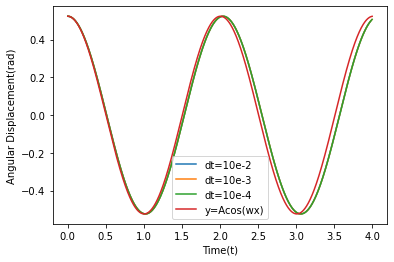

In [51]:
import matplotlib.pyplot as plt
import numpy as np
from math import *
g=9.80655 #gravity
L=1
ad0 = (1/6)*np.pi
for j in range(3):
    ad=ad0
    AD=[] #angular displacement
    t=0
    omega=0 #angular frequecy
    omega0 = 0
    alpha=0 #angular acceleration
    T=[]
    dt=10**(-2-j)
    for i in range(int(4//dt)):
        T.append(t)
        AD.append(ad)
        t += dt
        alpha = -(g/L)*sin(ad)
        omega0 = omega + alpha*dt/2
        ad += omega0*dt #This step we calculate the x(t+dt)
        alpha = -(g/L)*sin(ad) #We use x(t+dt) to calculate the new angular acceleration
        omega = omega0 + alpha*dt/2
    plt.plot(T,AD,label='dt=10e'+str(-2-j))
x = 0
y = ad0
X = []
Y = []
for i in range(40001):
    X.append(x)
    Y.append(y)
    x += 0.0001 
    y = ad0*cos(np.sqrt(g/L)*x)
plt.plot(X,Y,label='y=Acos(wx)')
plt.xlabel('Time(t)')
plt.ylabel('Angular Displacement(rad)')
plt.legend()
plt.show()

We have use three methods to plot the pendulum motion. It's easy to distinguish the accuracy of this 3 methods. Velocity Verlet method has the best accuracy, as it's curve are almost same. Euler method has least accuracy. We can see that if we didn't choose the timestep and $\theta_0$ small enough, this method would let the motion go to chaos.

We can see that if the $\theta_0$ is small enough, we can see the pendulum motion as a simple harmonic motion. The angular frequency converges to $\sqrt{\frac{g}{L}}$ when $\theta_0$ goes to 0.